In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# dataset can be found here: https://www.kaggle.com/henrysue/online-shoppers-intention
shop = pd.read_csv("online_shoppers_intention.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# Out target column is: Revenue - A boolean representing whether or not the user completed the purchase.

In [3]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
shop.shape

(12330, 18)

In [5]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

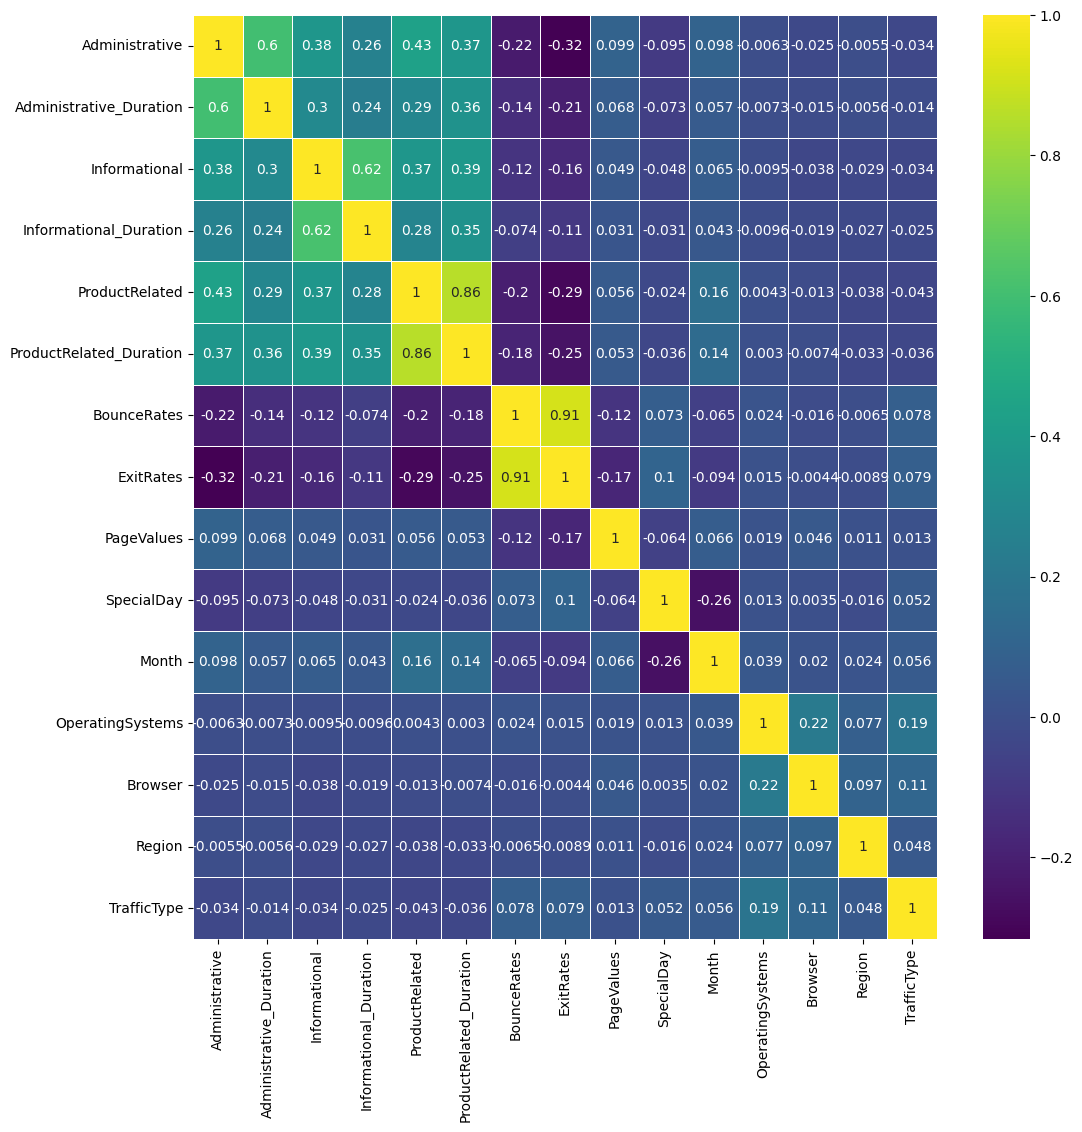

In [7]:
shop['Month'] = shop['Month'].map({
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 
    'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 
    'Nov': 11, 'Dec': 12
})

# Calculate the correlation matrix
numeric_columns = shop.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.show()


In [8]:
shope = shop.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

In [9]:
# Finding about categorical data

In [10]:
shope.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2.0,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2.0,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2.0,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2.0,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2.0,3,3,1,4,Returning_Visitor,True,False


In [12]:
shope['ProductRelated'].value_counts() # a categorical type but the data is too spread (ranges from 1 too 399)

ProductRelated
1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: count, Length: 311, dtype: int64

In [13]:
shope['Month'].value_counts()

Month
5.0     3364
11.0    2998
3.0     1907
12.0    1727
10.0     549
9.0      448
8.0      433
7.0      432
2.0      184
Name: count, dtype: int64

In [14]:
shope['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

In [15]:
shope['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [16]:
shope['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

In [17]:
shope['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

In [18]:
visitor = pd.get_dummies(shope['VisitorType'])

X = pd.concat([shope, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2.0,1,1,1,1,Returning_Visitor,False,False,False,False,True
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2.0,2,2,1,2,Returning_Visitor,False,False,False,False,True
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2.0,4,1,9,3,Returning_Visitor,False,False,False,False,True
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2.0,3,2,2,4,Returning_Visitor,False,False,False,False,True
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2.0,3,3,1,4,Returning_Visitor,True,False,False,False,True


In [19]:
# Now we have build some features and extracted some feature data, whats left is to remove redundant features
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [20]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

In [21]:
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

In [22]:
# The above code converts the boolean values to float type - actaully it converts all the data into float type. This has been done so that
# the sequential model is able to build tensors out of them
y.shape

(12330,)

In [23]:
X_new.shape

(12330, 15)

In [24]:
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
"""
In the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns 
in our X (Sepal Length, Sepal Width, Petal Length, Petal Width).

After this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.
The last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation 
function as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along 
with “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.
"""

'\nIn the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns \nin our X (Sepal Length, Sepal Width, Petal Length, Petal Width).\n\nAfter this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.\nThe last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation \nfunction as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along \nwith “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.\n'

In [26]:
model.fit(X_new,y,epochs=100, validation_split=0.1)

Epoch 1/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8598 - loss: 0.9825 - val_accuracy: 0.8191 - val_loss: 0.5961
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8842 - loss: 0.4156 - val_accuracy: 0.8305 - val_loss: 0.6744
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8760 - loss: 0.4406 - val_accuracy: 0.8248 - val_loss: 0.4352
Epoch 4/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8857 - loss: 0.3571 - val_accuracy: 0.8167 - val_loss: 0.6235
Epoch 5/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8859 - loss: 0.3295 - val_accuracy: 0.8370 - val_loss: 0.4784
Epoch 6/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8905 - loss: 0.2902 - val_accuracy: 0.8394 - val_loss: 0.4208
Epoch 7/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8923 - loss: 0.2790 - val_accuracy: 0.8370 - val_loss: 0.4143
Epoch 8/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8993 - loss: 0.2

In [28]:
# Saving the model so we can use this in out web app.

model.save("final_shopper_model.h5")